In [2]:
# 1
from PIL import Image
import matplotlib.pyplot as plt

Image displayed using display


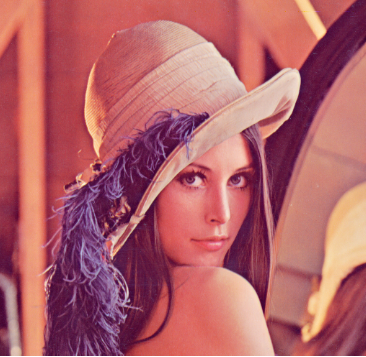

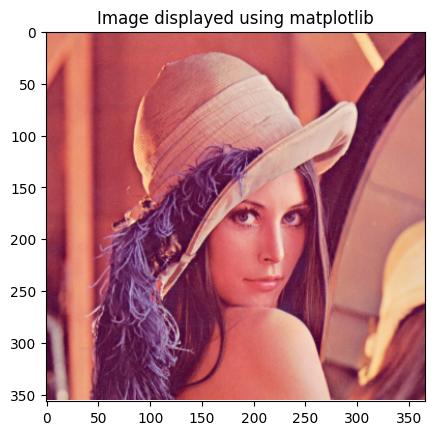

In [3]:
# 1.1
image = Image.open("/content/drive/MyDrive/AIandML/unnamed (1).png")
print("Image displayed using display")
display(image)
plt.imshow(image)
plt.title("Image displayed using matplotlib")
plt.show()

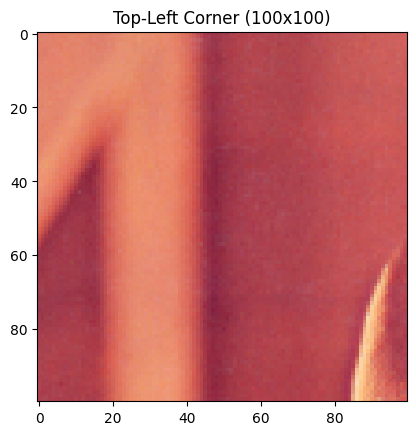

In [4]:
# 1.2
import numpy as np

image_array = np.array(image)

top_left_corner = image_array[:100, :100, :]

plt.imshow(top_left_corner)
plt.title("Top-Left Corner (100x100)")
plt.show()

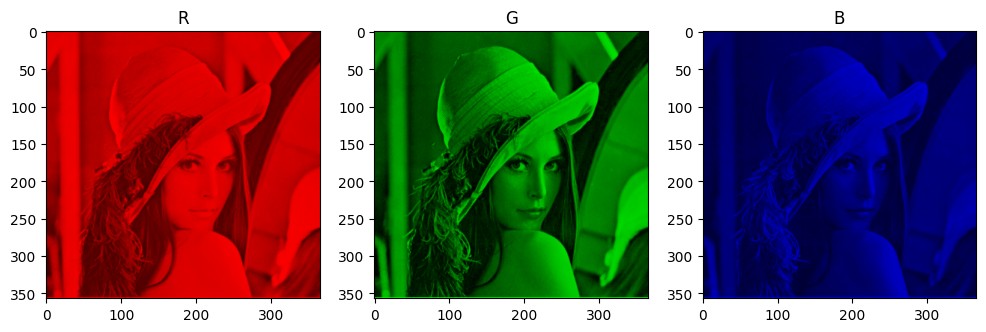

In [5]:
# 1.3
red_channel = image_array.copy()
green_channel = image_array.copy()
blue_channel = image_array.copy()

red_channel [:, :, 1:] = 0
green_channel [:, :, [0,2]] = 0
blue_channel [:, :, :2] = 0

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(red_channel,cmap='Reds')
plt.title('R')

plt.subplot(1, 3, 2)
plt.imshow(green_channel,cmap = 'Greens')
plt.title('G')

plt.subplot(1, 3, 3)
plt.imshow(blue_channel,cmap='Blues')
plt.title('B')

plt.show()

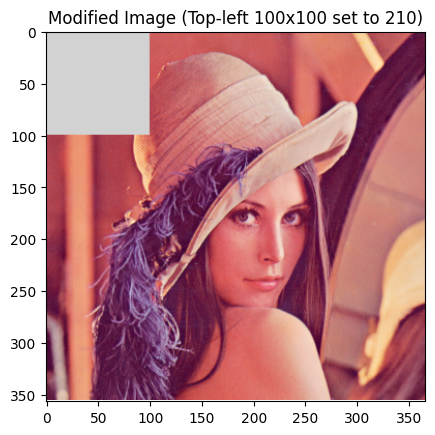

In [6]:
#1.4
image_array[:100, :100, :] = 210

modified_image = Image.fromarray(image_array.astype('uint8'))

plt.imshow(modified_image)
plt.title("Modified Image (Top-left 100x100 set to 210)")
plt.show()

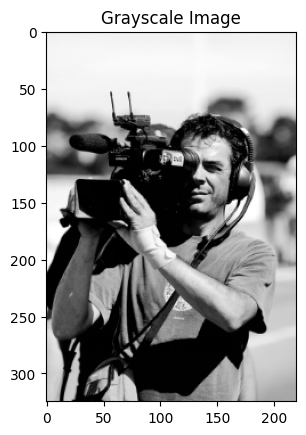

In [7]:
#2.1
image = Image.open("/content/drive/MyDrive/AIandML/unnamed.png")
image_gray = image.convert("L")
plt.imshow(image_gray, cmap="gray")
plt.title("Grayscale Image")
plt.show()

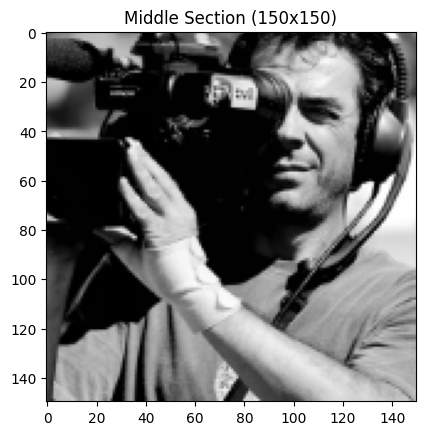

In [8]:
image_array_gray = np.array(image_gray)
height, width = image_array_gray.shape

center_x = width // 2
center_y = height // 2

start_x = center_x - 75
end_x = center_x + 75
start_y = center_y - 75
end_y = center_y + 75

middle_section = image_array_gray[start_y:end_y, start_x:end_x]

plt.imshow(middle_section, cmap='gray')
plt.title("Middle Section (150x150)")
plt.show()

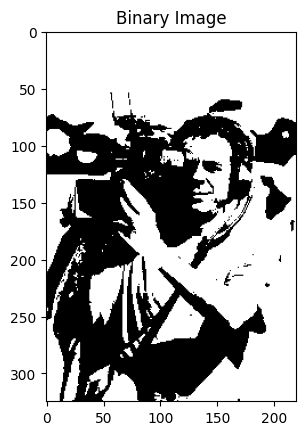

In [10]:
# 2.3
image_array_gray = np.array(image_gray)
threshold = 100
binary_image_array = np.where(image_array_gray < threshold, 0, 255)

binary_image = Image.fromarray(binary_image_array.astype('uint8'))

plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image")
plt.show()

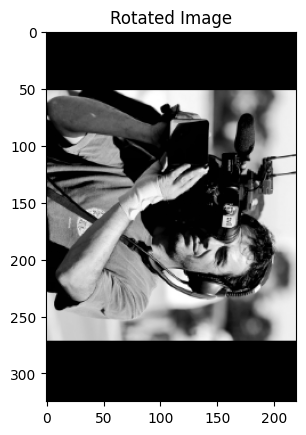

In [11]:
image_rotate = image.convert("L").rotate(270)
plt.imshow(image_rotate,cmap='gray')
plt.title("Rotated Image")
plt.show()

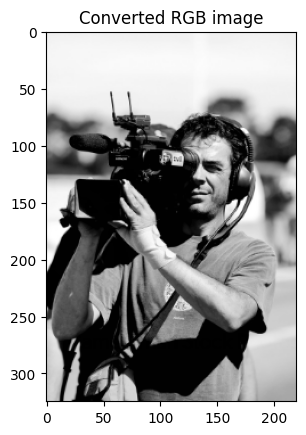

In [12]:
#2.5
image_rgb = image_gray.convert('RGB')
plt.imshow(image_rgb)
plt.title("Converted RGB image")
plt.show()

In [46]:
#3.1
image = Image.open("/content/drive/MyDrive/AIandML/Loki_Manga_Infobox.png")
image_gray = image.convert("L")
image_array_gray = np.array(image_gray)

mean = np.mean(image_array_gray)
std_dev = np.std(image_array_gray)

centered_data = image_array_gray - mean
standardized_data = centered_data / std_dev

covariance_matrix = np.cov(standardized_data.flatten())
print("Covariance matrix:\n", covariance_matrix)

Covariance matrix:
 1.000000226046622


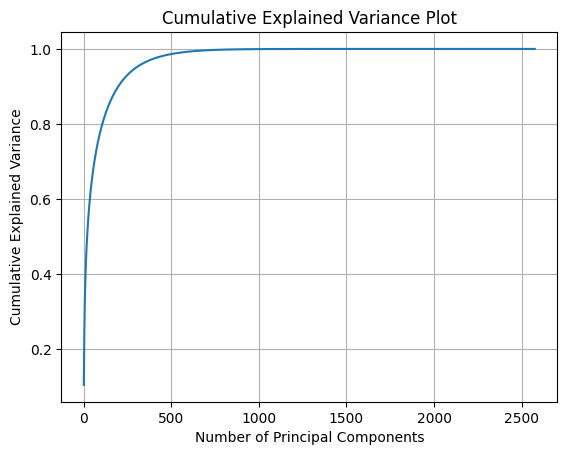

In [62]:
import numpy as np
import matplotlib.pyplot as plt

covariance_matrix = np.cov(standardized_data, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance Plot")
plt.grid(True)
plt.show()

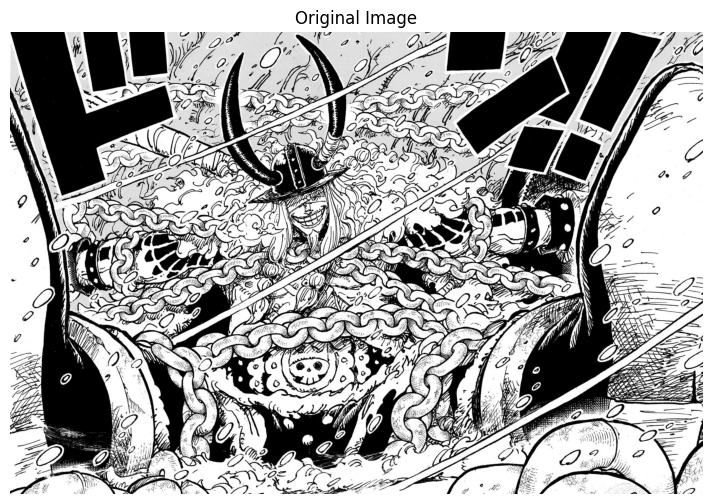

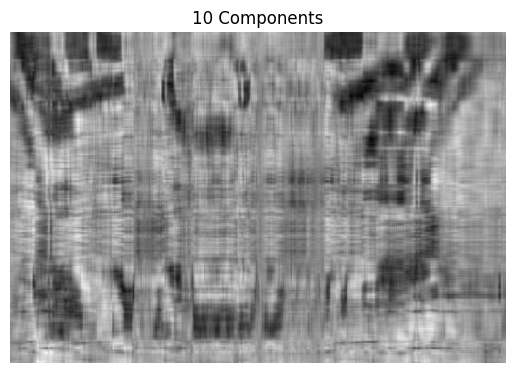

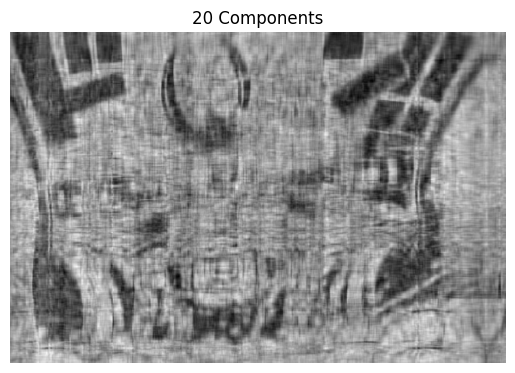

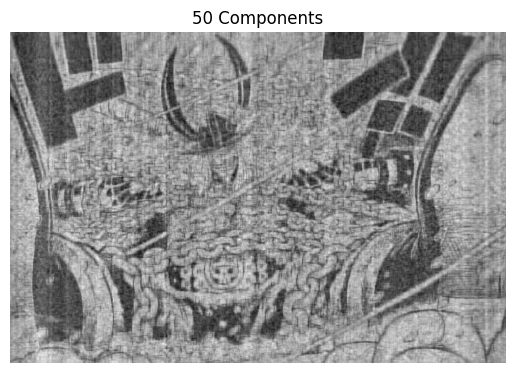

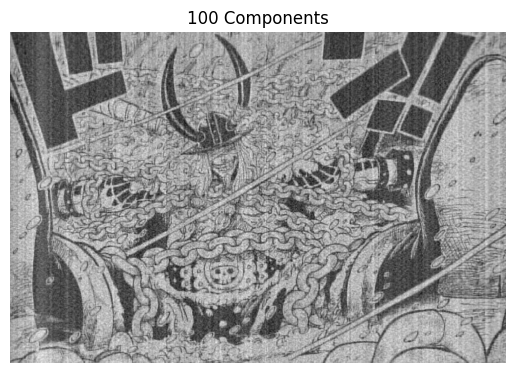

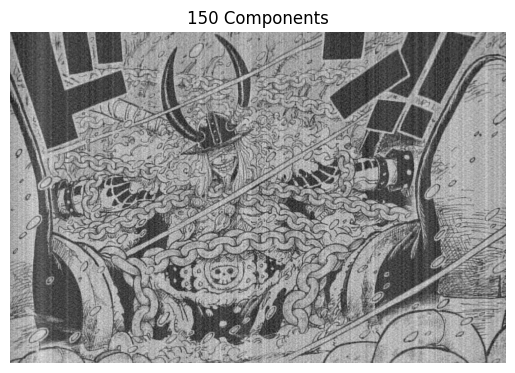

In [85]:
#3.3
import numpy as np
import matplotlib.pyplot as plt

# Original Image
plt.figure(figsize=(12, 6))
plt.imshow(image_array_gray, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()

def reconstruct_and_experiment(k_values):

  for k in k_values:
    top_k_eigenvectors = eigenvectors[:, :k]
    compressed_data = np.dot(centered_data, top_k_eigenvectors)
    compressed_data = compressed_data.real

    decompressed_data = np.dot(compressed_data, top_k_eigenvectors.T) + mean
    decompressed_data = decompressed_data.real

    # Decompressed Image
    plt.imshow(decompressed_data, cmap="gray")
    plt.title(f"{k} Components")
    plt.axis("off")
    plt.show()
k_values_to_test = [10, 20, 50, 100, 150]
reconstruct_and_experiment(k_values_to_test)